In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

In [3]:
# Shuffle the data
data = shuffle(data)

In [4]:
# Split the data
X = data.drop('label', axis=1)
y = data['label']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the scaler
scaler = StandardScaler()



In [7]:
# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
# Scale the testing data
X_test_scaled = scaler.transform(X_test)


In [9]:
# Initialize label encoder
label_encoder = LabelEncoder()

In [10]:
# Fit the label encoder to the training data
label_encoder.fit(y_train)


LabelEncoder()

In [11]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, label_encoder.transform(y_train))

RandomForestClassifier(random_state=42)

In [12]:
# Predict the labels for the testing data
y_pred_encoded = model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

In [13]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 ,'%')

Accuracy: 99.0909090909091 %


In [14]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        20
   blackgram       0.94      1.00      0.97        15
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        25
        jute       0.91      0.95      0.93        21
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.94      0.97        16
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        18
    

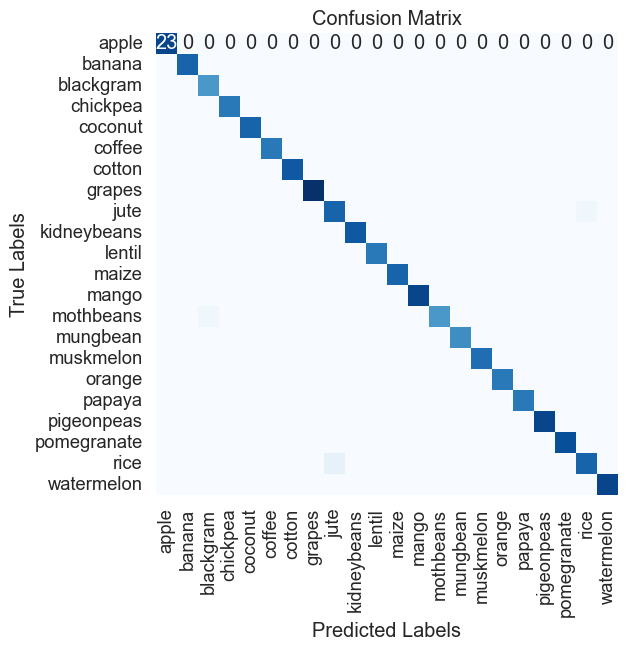

In [15]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get unique class labels
class_labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Enter new data
N = float(input("Enter the value of N:(range: 0 to 500 kg/ha)  "))
P = float(input("Enter the value of P:(range: 0 to 200 kg/ha) "))
K = float(input("Enter the value of K:(0 to 300 kg/ha) "))
temperature = float(input("Enter the value of temperature: "))
humidity = float(input("Enter the value of humidity:(range: 0 to 100) "))
ph = float(input("Enter the value of pH:(4.5 to 8.5) "))
rainfall = float(input("Enter the value of rainfall: "))


Enter the value of N:(range: 0 to 500 kg/ha)   100
Enter the value of P:(range: 0 to 200 kg/ha)  200
Enter the value of K:(0 to 300 kg/ha)  300
Enter the value of temperature:  26
Enter the value of humidity:(range: 0 to 100)  85
Enter the value of pH:(4.5 to 8.5)  6
Enter the value of rainfall:  202


In [17]:
# Preprocess new data
new_data = pd.DataFrame({'N': [N], 'P': [P], 'K': [K], 'temperature': [temperature], 'humidity': [humidity], 'ph': [ph], 'rainfall': [rainfall]})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Calculate distances between new data and training data
distances = []
for i in range(len(X_train_scaled)):
    distance = euclidean(new_data_scaled[0], X_train_scaled[i])
    distances.append(distance)


def find_closest_indices(distances):
    """
    Finds the indices of the two closest different samples.

    Args:
        distances: A list of distances between the new data and all training data.

    Returns:
        A list of indices of the two closest different samples.
    """
    distances = np.array(distances)  # Convert distances list to NumPy array
    closest_indices = []

    # Handle the initial case (if new data is closest to itself)
    if distances.any() == 0:
        closest_indices.append(np.argsort(distances)[1])
    else:
        closest_indices.append(np.argmin(distances))

    found_two = False
    # Find the second closest element
    for i in range(len(distances)):
        if i != closest_indices[0]:
            if not found_two:
                closest_indices.append(i)
                found_two = True
            else:
                break  # Exit the loop after finding the second closest element

    return closest_indices

# Find the indices of the two closest different samples
closest_indices = find_closest_indices(distances)

# Get the names of the two closest different samples
closest_names = [y_train.iloc[i] for i in closest_indices]
print("Names of the two closest different samples:", closest_names)

Names of the two closest different samples: ['apple', 'jute']
